## Task 6
### Finding of modulo maximum eigenvalue



In [69]:
import numpy as np
from scipy import linalg
from typing import Tuple, Callable
from math import sqrt
import matplotlib.pyplot as plt

#### Finds eigenvalue by power method

In [70]:
def find_eigenvalue_by_power_method(
        a_matrix: np.ndarray,
        eps: float,
        init_x: np.ndarray,
        max_steps: int = 10000
) -> Tuple[float, np.ndarray, int]:
    current_x = init_x / linalg.norm(init_x)

    for i in range(1, max_steps):
        next_x = a_matrix.dot(current_x)
        value = sqrt(next_x.dot(next_x) / current_x.dot(current_x))

        if linalg.norm(next_x - value * current_x) / linalg.norm(current_x) <= eps:
            return value, next_x, i

        current_x = next_x / linalg.norm(next_x)
    
    return value, next_x, i


### Finds eigenvalue by scalar method

In [71]:
def find_eigenvalue_by_scalar_method(
        a_matrix: np.ndarray,
        eps: float,
        init_x: np.ndarray,
        max_steps: int = 10000
) -> Tuple[float, np.ndarray, int]:
    current_x = init_x / linalg.norm(init_x)
    current_y = np.copy(current_x)
    
    next_x = a_matrix.dot(current_x)
    next_y = a_matrix.T.dot(current_y)

    curr_value = next_x.dot(next_y) / current_x.dot(next_y)

    for i in range(1, max_steps):
        current_x = next_x / linalg.norm(next_x)
        current_y = next_y / linalg.norm(next_y)
        next_x = a_matrix.dot(current_x)
        next_y = a_matrix.T.dot(current_y)

        next_value = next_x.dot(next_y) / current_x.dot(next_y)

        if linalg.norm(next_value - curr_value) <= eps:
            return next_value, next_x, i

        curr_value = next_value

    return next_value, next_x, i

In [72]:
def run_test(
        a_matrix: np.ndarray,
        function: Callable[[np.ndarray, float, np.ndarray], Tuple[float, np.ndarray, int]]
):
    epsilons = []
    steps = []
    eigenvalue = 0
    eigenvector = np.zeros(1)

    for i in range (-2, -15, -1):
        eps = 10 ** i
        epsilons.append(eps)
        calculated_value, calculated_vector, iterations = function(a_matrix, eps, np.ones(a_matrix.shape[0]))
        steps.append(iterations)

        eigenvalue = calculated_value
        eigenvector = calculated_vector
    
    eigenvalues, eigenvectors = np.linalg.eig(a_matrix)
    max_eigenvalue_index = np.argmax(eigenvalues)
    real_max_eigenvalue = eigenvalues[max_eigenvalue_index]
    real_eigenvector = eigenvectors[max_eigenvalue_index]

    print("Calculated max eigenvalue: \n", eigenvalue)
    print("Calculated eigenvector: \n", eigenvector)

    print("Real max eigenvalue: \n", real_max_eigenvalue)
    print("Real eigenvector: \n", real_eigenvector)

    print("Eigenvalue error: ", abs(eigenvalue - real_max_eigenvalue))
    print("Eigenvector error: ", linalg.norm(abs(eigenvector / linalg.norm(eigenvector)) - abs(real_eigenvector)))

    plt.figure(figsize=(6, 3))
    plt.plot(epsilons, steps, label='Steps to find value with epsilon', color='red')
    plt.xscale('log')
    plt.xlabel('epsilon')
    plt.ylabel('steps')
    plt.grid()
    plt.show()

### Test 1
#### Hilbert matrix

A matrix: 
 [[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
Results for power method:
Calculated max eigenvalue: 
 1.5670506910982311
Calculated eigenvector: 
 [1.20326729 0.69857719 0.50392949 0.39715167 0.32880271]
Real max eigenvalue: 
 1.5670506910982296
Real eigenvector: 
 [-0.76785474 -0.60187148 -0.21421362 -0.04716181  0.00617386]
Eigenvalue error:  1.5543122344752192e-15
Eigenvector error:  0.3462821812934568


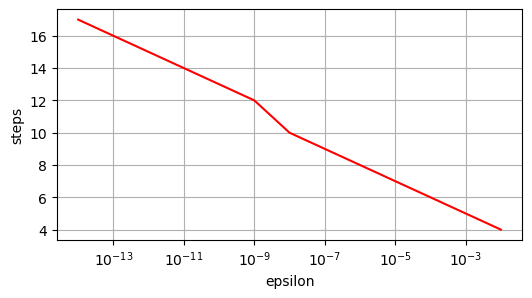

Results for scalar method:
Calculated max eigenvalue: 
 1.5670506910982307
Calculated eigenvector: 
 [1.20326729 0.69857719 0.50392949 0.39715167 0.32880271]
Real max eigenvalue: 
 1.5670506910982296
Real eigenvector: 
 [-0.76785474 -0.60187148 -0.21421362 -0.04716181  0.00617386]
Eigenvalue error:  1.1102230246251565e-15
Eigenvector error:  0.34628218173732056


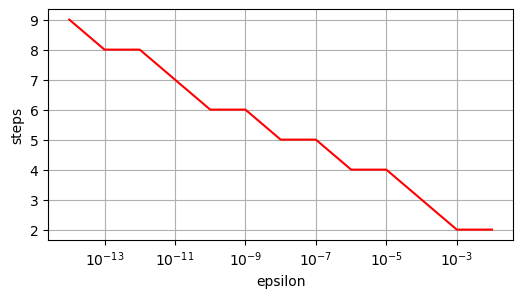

In [73]:
a_matrix = linalg.hilbert(5)
print("A matrix: \n", a_matrix)


print("Results for power method:")
run_test(a_matrix, find_eigenvalue_by_power_method)

print("Results for scalar method:")
run_test(a_matrix, find_eigenvalue_by_scalar_method)

### Test 2
#### Big Hilbert matrix

A matrix: 
 [[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625     0.05882353 0.05555556
  0.05263158 0.05       0.04761905 0.04545455 0.04347826 0.04166667
  0.04       0.03846154 0.03703704 0.03571429 0.03448276 0.03333333]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625     0.05882353 0.05555556 0.05263158
  0.05       0.04761905 0.04545455 0.04347826 0.04166667 0.04
  0.03846154 0.03703704 0.03571429 0.03448276 0.03333333 0.03225806]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0625     0.05882353 0.05555556 0.05263158 0.05
  0.04761905 0.04545455 0.04347826 0.04166667 0.04       0.03846154
  0.03703704 0.03571429 0.03448276 0.03333333 0.032

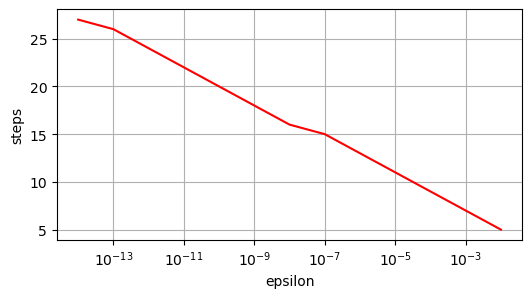

Results for scalar method:
Calculated max eigenvalue: 
 1.986492568608736
Calculated eigenvector: 
 [1.21328793 0.77937351 0.60148538 0.49876444 0.43003504 0.38006158
 0.3417205  0.31117482 0.28615015 0.26520145 0.24736089 0.23195275
 0.2184892  0.20660813 0.19603446 0.18655502 0.17800176 0.17024024
 0.16316147 0.15667606 0.15070993 0.14520114 0.14009743 0.13535438
 0.13093397 0.12680347 0.1229345  0.11930235 0.11588539 0.11266458]
Real max eigenvalue: 
 (1.986492568608738+0j)
Real eigenvector: 
 [-6.10768930e-01+0.00000000e+00j -6.49456867e-01+0.00000000e+00j
  3.99292008e-01+0.00000000e+00j -1.94430920e-01+0.00000000e+00j
  8.24486334e-02+0.00000000e+00j  3.15393562e-02+0.00000000e+00j
 -1.10787182e-02+0.00000000e+00j -3.61104465e-03+0.00000000e+00j
  1.09945121e-03+0.00000000e+00j  3.14081546e-04+0.00000000e+00j
 -8.44361013e-05+0.00000000e+00j -2.14037326e-05+0.00000000e+00j
  5.12215084e-06+0.00000000e+00j  1.15792341e-06+0.00000000e+00j
  2.47372216e-07+0.00000000e+00j  4.9408375

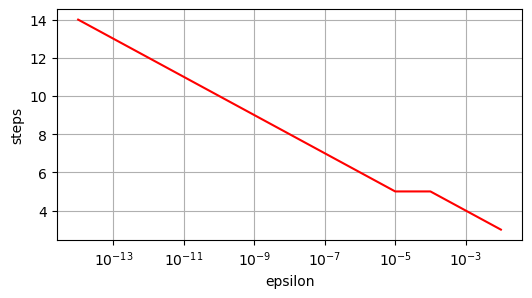

In [74]:
a_matrix = linalg.hilbert(30)
print("A matrix: \n", a_matrix)


print("Results for power method:")
run_test(a_matrix, find_eigenvalue_by_power_method)

print("Results for scalar method:")
run_test(a_matrix, find_eigenvalue_by_scalar_method)